Code by: Andrea Moscatello

Github: https://github.com/AndreaMoscatello/ChessAutoGUI/

The original chess pieces datasets and the CNN comes from: 
- https://www.kaggle.com/datasets/s4lman/chess-pieces-dataset-85x85/code
- https://www.kaggle.com/code/hasanatlodhi/chess-pieces-identification
The dataset is expanded with the lichess pieces.

Few differences to the CNN has been made just to play around with the parameters. As the model was still not showing a satisfaying accuracy, the key feature to increment the correct classification rate is the binarization of the images before evaluation. 

In [15]:
import numpy as np 
import pandas as pd 
import cv2
import os
import joblib # to save the model
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense
from keras.models import load_model

In [52]:
# create a list with the images path and the corresponding label
images_path = []
labels = []

pieces = os.listdir("data")
for piece in pieces:
    images = os.listdir(os.path.join("data", piece))

    # for each image append the path and the label
    for image in images:
        images_path.append(os.path.join("data", piece, image))
        labels.append(piece)  

In [53]:
# load and normalize the images
images = []
for image in images_path:
    img = cv2.imread(image)
    img = np.array(img)
    img = img/255.0
    images.append(img)
print("Images: ", len(images))

Images:  569


In [54]:
encoder =  OneHotEncoder()
labels = np.array(labels).reshape(-1, 1) # reshape the labels to a Nx1 array
encoder_labels = encoder.fit_transform(labels).toarray() # one hot encode the labels

In [55]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(images, 
                                                    encoder_labels, 
                                                    test_size=0.25, 
                                                    random_state=104,
                                                    shuffle=True)

# convert the lists to numpy arrays
X_train=np.array(X_train)
X_test=np.array(X_test)

In [56]:
# data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_datagen = ImageDataGenerator() # default params --> no augmentation

In [57]:
bath_size = 32
train_generator = train_datagen.flow(X_train, y_train, batch_size=bath_size)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=bath_size)

In [58]:
# create the model
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(85, 85, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.fit(train_generator, batch_size=32, epochs=200)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.9668 - loss: 0.1051
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.9675 - loss: 0.1016
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy: 0.9659 - loss: 0.0946
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.9370 - loss: 0.1177
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - accuracy: 0.9638 - loss: 0.1091
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.9644 - loss: 0.0863
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.9809 - loss: 0.0790
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.9670 - loss: 0.0897
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.9666 - loss: 0.0860
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.9696 - loss: 0.1295
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.9591 - loss: 0.1415
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4

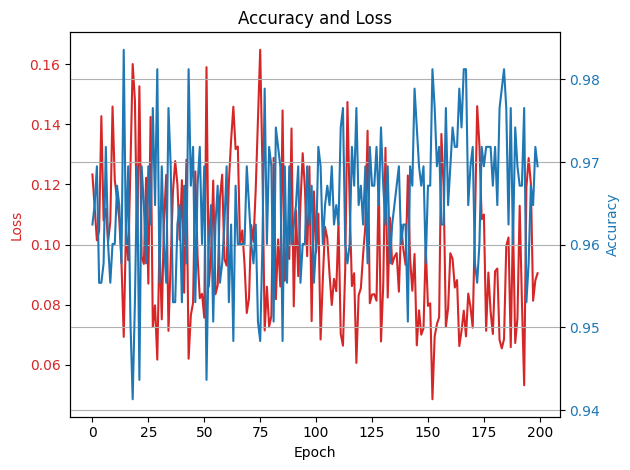

In [74]:
# plot the accuracy and loss with one scale on the left and one on the right

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(model.history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(model.history.history['accuracy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Accuracy and Loss")

plt.grid()
# plot x lines grid
plt.grid(axis='x')

fig.tight_layout()
plt.show()


In [75]:
# save the trained model to a file
model.save("model.keras")
print("Model saved to model.keras")

# save the encoder to a file
joblib.dump(encoder, "encoder.pkl")
print("Encoder saved to encoder.pkl")


Model saved to model.keras
Encoder saved to encoder.pkl


In [76]:
model.evaluate(validation_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9964 - loss: 0.0571


[0.10484857857227325, 0.9930070042610168]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

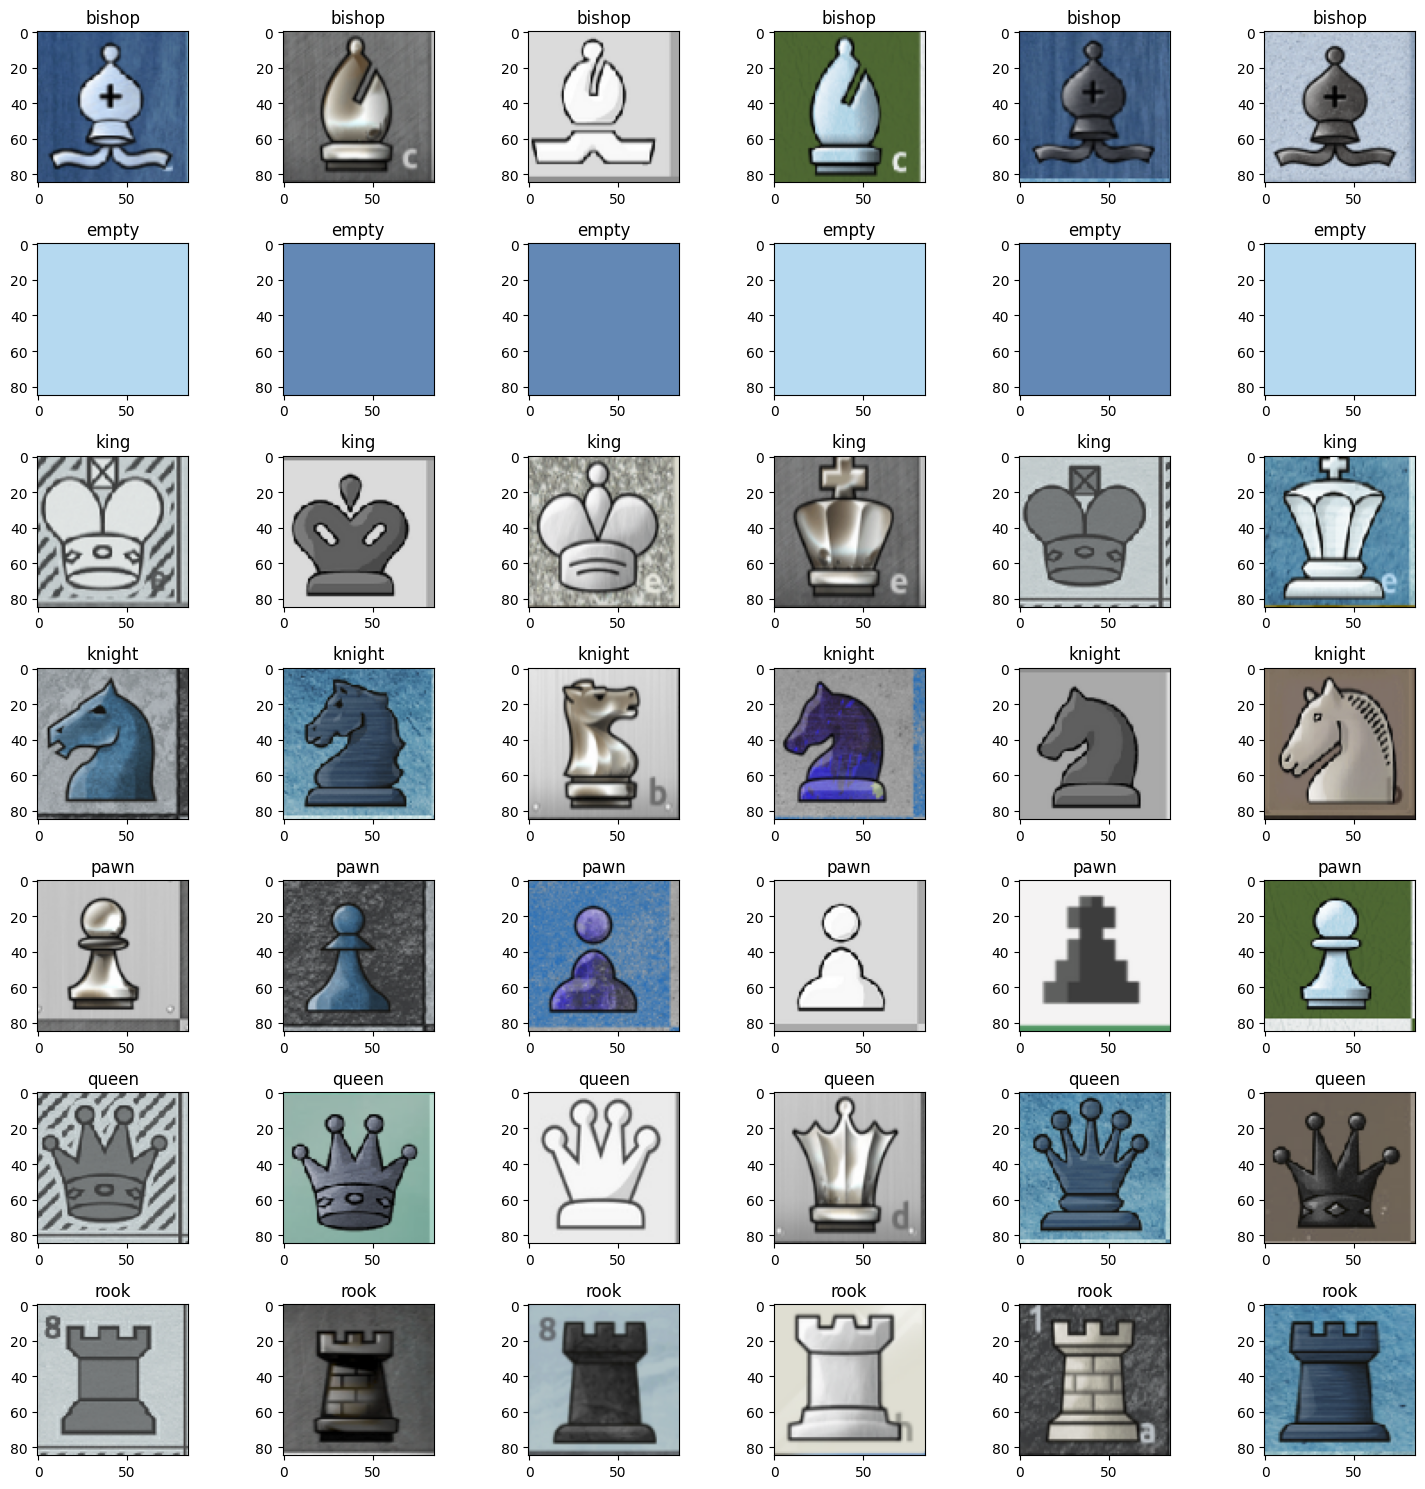

In [77]:
idth=50
height=50
rows = 7
cols = 6
axes=[]
fig=plt.figure(figsize=(15,15))
a=0
for directory in os.listdir('data'):
    for imgs in os.listdir(f'data/{directory}')[:6]:
        img=cv2.imread(f'data/{directory}/{imgs}')
        axes.append( fig.add_subplot(rows, cols, a+1) )
        a+=1
        plt.imshow(img)
        img=img/255
        img=np.expand_dims(img,axis=0)
        subplot_title=(pieces[np.argmax(model.predict(img))])
        axes[-1].set_title(subplot_title)
plt.tight_layout()        
plt.show()

In [51]:
# show the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 83, 83, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 41, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 41, 41, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 41, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 39, 39, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 19, 19, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 19, 19, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 11552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │       184,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 616,439 (2.35 MB)

 Trainable params: 205,415 (802.40 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 410,832 (1.57 MB)

# 2) Load the model

In [14]:
# load the encoder and model
encoder = joblib.load("encoder.pkl")
model = load_model("model.keras")

model.evaluate(validation_generator)


2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9219 - loss: 0.1929 

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9326 - loss: 0.2035


[0.22013147175312042, 0.9384615421295166]